In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\daataa.csv")

In [3]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Deepali Charan,Male,20.0,Average,18-Oct-20,Website,112650.0,IND
1,Yagna Sujeev,Female,32.0,Above average,7-Apr-21,Website,43840.0,IND
2,Satyendra Venkatadri,Male,31.0,Average,12-Apr-22,Procurement,103550.0,IND
3,Madhavdas Buhpathi,Female,32.0,Average,23-May-21,HR,45510.0,IND
4,Sahila Chandrasekhar,NaN,37.0,Poor,11-Sep-20,Finance,115440.0,IND
...,...,...,...,...,...,...,...,...
209,Hoyt D'Alesco,Male,32.0,Average,26-Sep-21,Sales,53540.0,NZ
210,Halimeda Kuscha,Female,30.0,Average,27-Oct-22,Procurement,112570.0,NZ
211,Erin Androsik,Male,33.0,Above average,20-May-22,Procurement,48530.0,NZ
212,Vic Radolf,Female,24.0,Average,13-Nov-20,Website,62780.0,NZ


In [4]:
data.shape

(214, 8)

In [5]:
data.describe()

,Age,Salary
count,212.000000,2.140000e+02
mean,30.443396,1.184137e+05
std,6.091841,5.938894e+05
min,19.000000,3.392000e+04
25%,26.750000,5.687000e+04
50%,30.000000,7.538000e+04
75%,34.000000,1.035500e+05
max,46.000000,8.757930e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         214 non-null    object 
 1   Gender       201 non-null    object 
 2   Age          212 non-null    float64
 3   Rating       213 non-null    object 
 4   Date Joined  212 non-null    object 
 5   Department   212 non-null    object 
 6   Salary       214 non-null    float64
 7   Country      214 non-null    object 
dtypes: float64(2), object(6)
memory usage: 13.5+ KB


In [7]:
data.duplicated().sum()

28

In [8]:
data=data.drop_duplicates()

In [9]:
data=data.reset_index(drop=True)

In [10]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Deepali Charan,Male,20.0,Average,18-Oct-20,Website,112650.0,IND
1,Yagna Sujeev,Female,32.0,Above average,7-Apr-21,Website,43840.0,IND
2,Satyendra Venkatadri,Male,31.0,Average,12-Apr-22,Procurement,103550.0,IND
3,Madhavdas Buhpathi,Female,32.0,Average,23-May-21,HR,45510.0,IND
4,Sahila Chandrasekhar,NaN,37.0,Poor,11-Sep-20,Finance,115440.0,IND
...,...,...,...,...,...,...,...,...
181,Gigi Bohling,Male,33.0,Average,8-Jul-21,Sales,74550.0,NZ
182,Ebonee Roxburgh,Male,30.0,Average,20-May-22,Procurement,67950.0,NZ
183,Shayne Stegel,Male,42.0,Poor,19-Jun-22,Finance,70270.0,NZ
184,Zach Polon,Male,26.0,Average,3-Aug-21,Procurement,53540.0,NZ


## Checking Features

In [11]:
data['Gender'].isna().sum()

10

In [12]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
data['Age'].describe()

count    184.000000
mean      30.445652
std        6.055958
min       19.000000
25%       27.000000
50%       30.000000
75%       34.000000
max       46.000000
Name: Age, dtype: float64

In [14]:
data['Rating'].isna().sum()

1

In [15]:
data['Date Joined'].describe()

count           184
unique          161
top       20-May-22
freq              4
Name: Date Joined, dtype: object

In [16]:
data['Department'].isna().sum()

2

In [17]:
data['Department'].info

<bound method Series.info of 0          Website
1          Website
2      Procurement
3               HR
4          Finance
          ...     
181          Sales
182    Procurement
183        Finance
184    Procurement
185            NaN
Name: Department, Length: 186, dtype: object>

In [18]:
data['Salary'].info

<bound method Series.info of 0      112650.0
1       43840.0
2      103550.0
3       45510.0
4      115440.0
         ...   
181     74550.0
182     67950.0
183     70270.0
184     53540.0
185     77472.1
Name: Salary, Length: 186, dtype: float64>

In [19]:
data['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 186 entries, 0 to 185
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
186 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


## we have analysed the given errors and problems in the data.
##### The gender column contain nan values.
##### The Age column type is not correct.
##### Rating contain 1 missing value.
##### data is not in correct formate.
##### department contain 2 missing departments name.
##### The salaries should be in dollers.









# Data Preprocessing 

### Data Cleaning

In [20]:
def replace_non_gender(gender):
    if gender not in ['Male', 'Female']:
        return 'Other'
    return gender
data['Gender'] = data['Gender'].apply(replace_non_gender)

In [21]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [22]:
data['Age'].unique()

array([20., 32., 31., 37., 38., 25., 33., 40., 30., 28., 21., 34., 36.,
       22., 27., 43., 42., 35., 24., 44., 26., 29., 23., 19., 46., nan])

In [23]:
age_mean=data['Age'].mean()

In [24]:
data['Age'].fillna(value=age_mean,inplace=True)

In [25]:
data['Age'].isna().sum()

0

In [26]:
data['Age']=data['Age'].astype(int)

In [27]:
#Getting the indexes.
data['Date Joined'].index[data.isnull().any(axis=1)]

Int64Index([92, 185], dtype='int64')

In [28]:
data.loc[[92,185]]
#these indexs need to be remove.

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
92,Total,Other,30,NaN,NaN,NaN,8757930.0,IND
185,Total,Other,30,100,NaN,NaN,77472.1,NZ


In [29]:
data=data.drop([data.index[92],data.index[185]])

In [30]:
data['Date Joined']= pd.to_datetime(data['Date Joined'], format='%d-%b-%y')

In [31]:
data['Date Joined']

0     2020-10-18
1     2021-04-07
2     2022-04-12
3     2021-05-23
4     2020-09-11
         ...    
180   2021-04-26
181   2021-07-08
182   2022-05-20
183   2022-06-19
184   2021-08-03
Name: Date Joined, Length: 184, dtype: datetime64[ns]

In [32]:
data['Rating'].unique()

array(['Average', 'Above average', 'Poor', 'Exceptional', 'Very poor'],
      dtype=object)

In [33]:
data['Department'].unique()

array(['Website', 'Procurement', 'HR', 'Finance', 'Sales'], dtype=object)

In [34]:
#Changing the formate of currency.
data['Salary']

0      112650.0
1       43840.0
2      103550.0
3       45510.0
4      115440.0
         ...   
180     75280.0
181     74550.0
182     67950.0
183     70270.0
184     53540.0
Name: Salary, Length: 184, dtype: float64

In [35]:
data['Salary']

0      112650.0
1       43840.0
2      103550.0
3       45510.0
4      115440.0
         ...   
180     75280.0
181     74550.0
182     67950.0
183     70270.0
184     53540.0
Name: Salary, Length: 184, dtype: float64

In [36]:
salary_mean=data['Salary'].mean()

In [37]:
data['Salary']=data['Salary'].astype(float)

In [38]:
data['Salary'] = data['Salary'].apply(lambda x: f"${x:,.2f}")

In [39]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Deepali Charan,Male,20,Average,2020-10-18,Website,"$112,650.00",IND
1,Yagna Sujeev,Female,32,Above average,2021-04-07,Website,"$43,840.00",IND
2,Satyendra Venkatadri,Male,31,Average,2022-04-12,Procurement,"$103,550.00",IND
3,Madhavdas Buhpathi,Female,32,Average,2021-05-23,HR,"$45,510.00",IND
4,Sahila Chandrasekhar,Other,37,Poor,2020-09-11,Finance,"$115,440.00",IND
...,...,...,...,...,...,...,...,...
180,Elia Cockton,Female,33,Average,2021-04-26,Website,"$75,280.00",NZ
181,Gigi Bohling,Male,33,Average,2021-07-08,Sales,"$74,550.00",NZ
182,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,"$67,950.00",NZ
183,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,"$70,270.00",NZ


In [40]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Deepali Charan,Male,20,Average,2020-10-18,Website,"$112,650.00",IND
1,Yagna Sujeev,Female,32,Above average,2021-04-07,Website,"$43,840.00",IND
2,Satyendra Venkatadri,Male,31,Average,2022-04-12,Procurement,"$103,550.00",IND
3,Madhavdas Buhpathi,Female,32,Average,2021-05-23,HR,"$45,510.00",IND
4,Sahila Chandrasekhar,Other,37,Poor,2020-09-11,Finance,"$115,440.00",IND
...,...,...,...,...,...,...,...,...
180,Elia Cockton,Female,33,Average,2021-04-26,Website,"$75,280.00",NZ
181,Gigi Bohling,Male,33,Average,2021-07-08,Sales,"$74,550.00",NZ
182,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,"$67,950.00",NZ
183,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,"$70,270.00",NZ


## Feature Engineering


In [41]:
from datetime import datetime

data['Date Joined'] = pd.to_datetime(data['Date Joined'])
current_date = pd.Timestamp(datetime.now())
data['Tenure'] = (current_date - data['Date Joined']).astype('timedelta64[D]')

In [42]:
data['Tenure']=data['Tenure']/365

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 184
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         184 non-null    object        
 1   Gender       184 non-null    object        
 2   Age          184 non-null    int32         
 3   Rating       184 non-null    object        
 4   Date Joined  184 non-null    datetime64[ns]
 5   Department   184 non-null    object        
 6   Salary       184 non-null    object        
 7   Country      184 non-null    object        
 8   Tenure       184 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 13.7+ KB


### Summery Description

In [44]:
Age_m=data['Age'].mean()

In [45]:
salary_mean =  f"${salary_mean:,.2f}"

In [46]:
salary_mean

'$77,366.52'

In [47]:
tenure_m=data['Tenure'].mean()

In [48]:
Gender=data['Gender'].value_counts()

In [49]:
#Counting the Male staff
male_count=Gender.get("Male",0)

In [50]:
#Counting the Female staff
female_count=Gender.get("Female",0)

In [51]:
#Finding Male ratio
Male_Ratio=(male_count*100)/184

In [52]:
#Finding Female ratio
Female_Ratio=(female_count*100)/184

In [53]:
#It will directly find the Gender ratio.
Gender_per = data['Gender'].value_counts(normalize=True) * 100

In [54]:
Gender_per

Male      48.913043
Female    46.739130
Other      4.347826
Name: Gender, dtype: float64

In [55]:
df={
'Average Age': [Age_m],
'Average Salary': [salary_mean],
'F_Ratio':[Female_Ratio],
 'M_Ratio':[Male_Ratio],
  'Average_Tenure':[tenure_m]  
}

In [56]:
summery=pd.DataFrame(df)

In [57]:
summery

,Average Age,Average Salary,F_Ratio,M_Ratio,Average_Tenure
0,30.445652,"$77,366.52",46.73913,48.913043,2.478082


### Exploratory Data Analysis

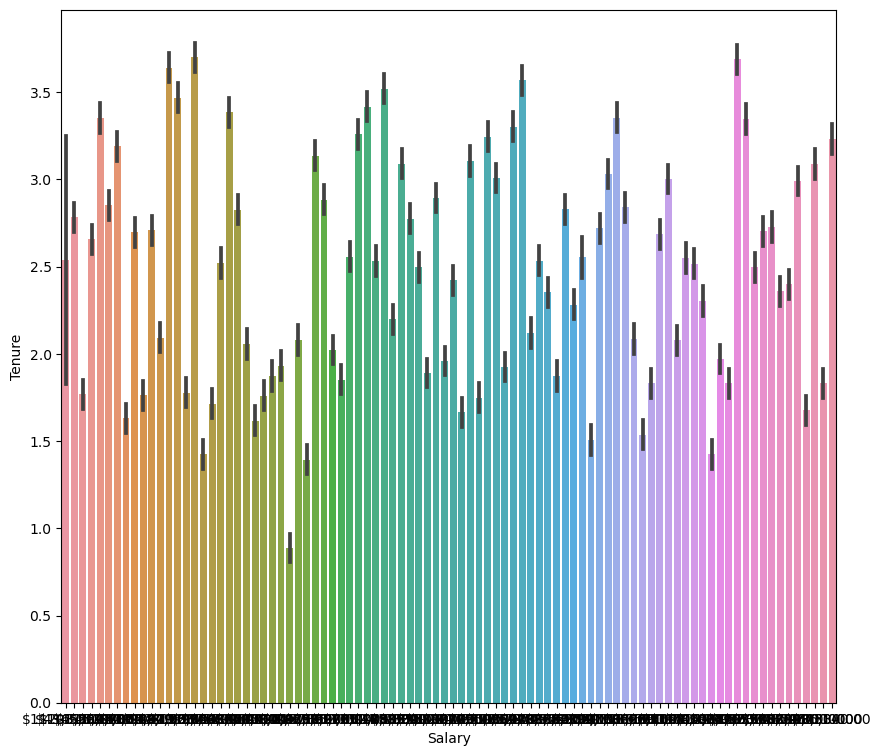

In [58]:
plt.figure(figsize=[10,9])
sns.barplot(x=data['Salary'],y=data['Tenure'])
plt.xlabel('Salary')
plt.ylabel('Tenure')
plt.show()

In [59]:
average_tenure_by_country = data.groupby('Country')['Tenure'].mean().reset_index()

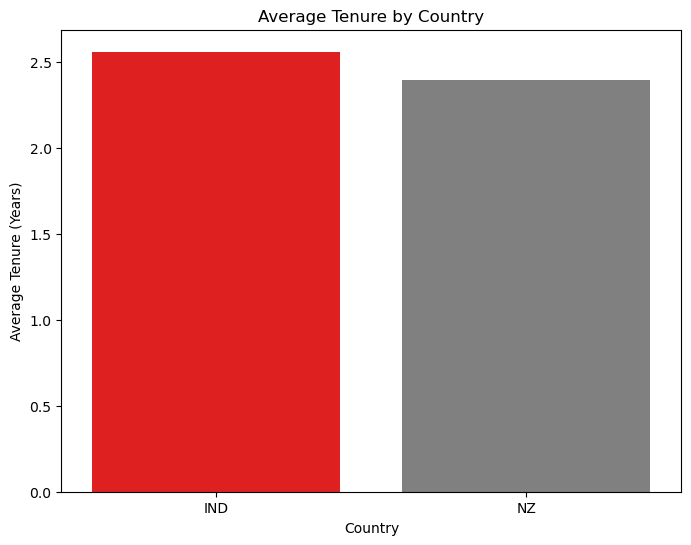

In [60]:
plt.figure(figsize=(8, 6))
plt.title('Average Tenure by Country')
sns.barplot(average_tenure_by_country['Country'], average_tenure_by_country['Tenure'], palette=["Red","Grey"])
plt.xlabel('Country')
plt.ylabel('Average Tenure (Years)')
plt.show()

In [61]:
data['Salary'] = data['Salary'].str.replace('[$,]', '', regex=True).astype(float)


In [62]:
Average_salary_by_country=data.groupby('Country')['Salary'].mean().reset_index()

In [63]:
Average_salary_by_country

,Country,Salary
0,IND,77366.521739
1,NZ,77366.521739


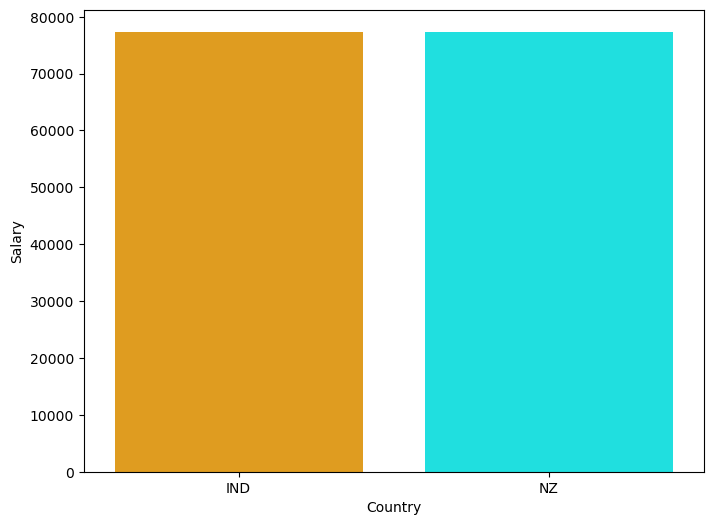

In [64]:
plt.figure(figsize=[8,6])
sns.barplot(Average_salary_by_country['Country'],Average_salary_by_country['Salary'],palette=['Orange','cyan'])
plt.show()

### The Trend shows that, the average salaries in India and New Zealand are the same.

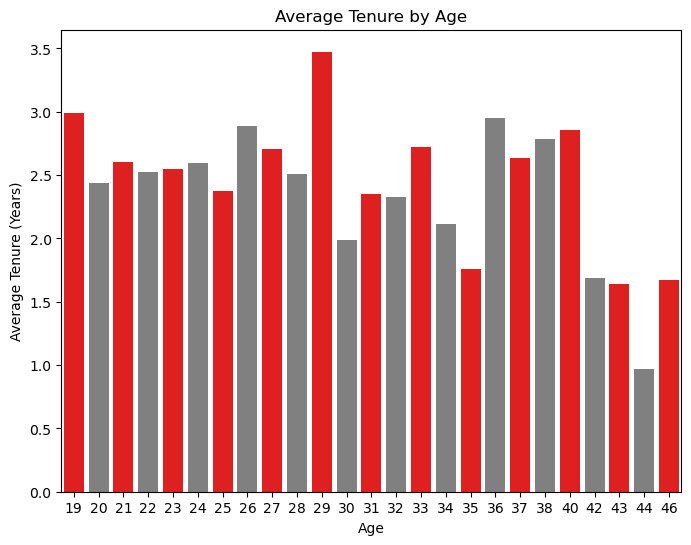

In [65]:
average_tenure_by_country = data.groupby('Age')['Tenure'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.title('Average Tenure by Age')
sns.barplot(average_tenure_by_country['Age'], average_tenure_by_country['Tenure'], palette=["Red","Grey"])
plt.xlabel('Age')
plt.ylabel('Average Tenure (Years)')
plt.show()

#### The analysis of the chart shows that younger employees tend to have longer tenures than older employees.

In [66]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country,Tenure
0,Deepali Charan,Male,20,Average,2020-10-18,Website,112650.0,IND,3.334247
1,Yagna Sujeev,Female,32,Above average,2021-04-07,Website,43840.0,IND,2.865753
2,Satyendra Venkatadri,Male,31,Average,2022-04-12,Procurement,103550.0,IND,1.852055
3,Madhavdas Buhpathi,Female,32,Average,2021-05-23,HR,45510.0,IND,2.739726
4,Sahila Chandrasekhar,Other,37,Poor,2020-09-11,Finance,115440.0,IND,3.435616
...,...,...,...,...,...,...,...,...,...
180,Elia Cockton,Female,33,Average,2021-04-26,Website,75280.0,NZ,2.813699
181,Gigi Bohling,Male,33,Average,2021-07-08,Sales,74550.0,NZ,2.613699
182,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,67950.0,NZ,1.747945
183,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,70270.0,NZ,1.665753


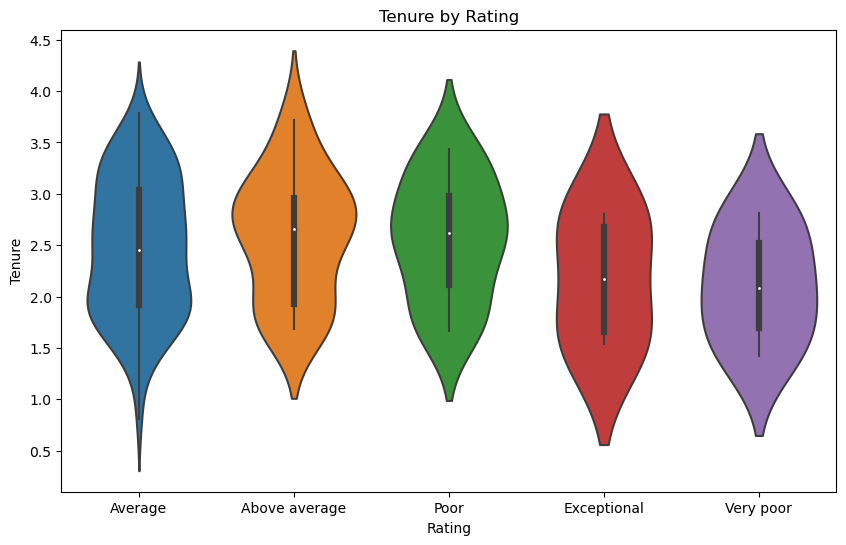

In [67]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rating', y='Tenure', data=data)
plt.title('Tenure by Rating')
plt.xlabel('Rating')
plt.ylabel('Tenure')
plt.show()

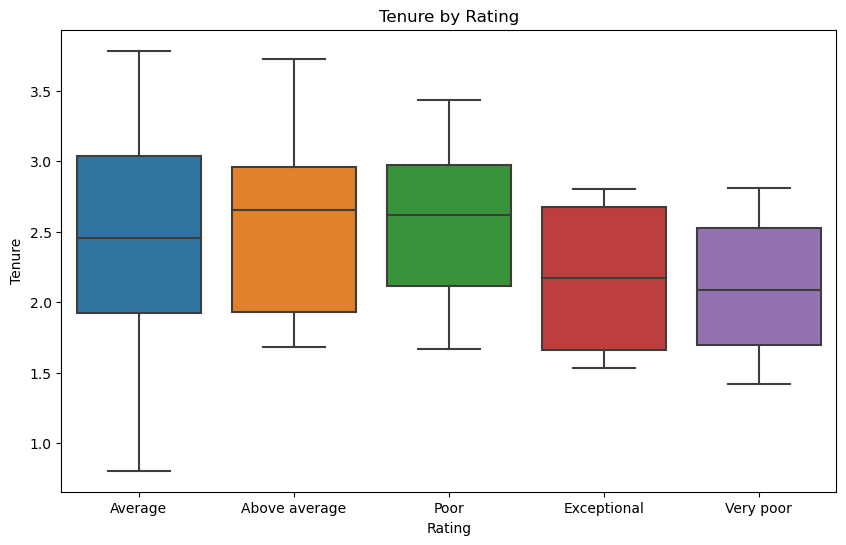

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Tenure', data=data)
plt.title('Tenure by Rating')
plt.xlabel('Rating')
plt.ylabel('Tenure')
plt.show()

In [69]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country,Tenure
0,Deepali Charan,Male,20,Average,2020-10-18,Website,112650.0,IND,3.334247
1,Yagna Sujeev,Female,32,Above average,2021-04-07,Website,43840.0,IND,2.865753
2,Satyendra Venkatadri,Male,31,Average,2022-04-12,Procurement,103550.0,IND,1.852055
3,Madhavdas Buhpathi,Female,32,Average,2021-05-23,HR,45510.0,IND,2.739726
4,Sahila Chandrasekhar,Other,37,Poor,2020-09-11,Finance,115440.0,IND,3.435616
...,...,...,...,...,...,...,...,...,...
180,Elia Cockton,Female,33,Average,2021-04-26,Website,75280.0,NZ,2.813699
181,Gigi Bohling,Male,33,Average,2021-07-08,Sales,74550.0,NZ,2.613699
182,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,67950.0,NZ,1.747945
183,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,70270.0,NZ,1.665753


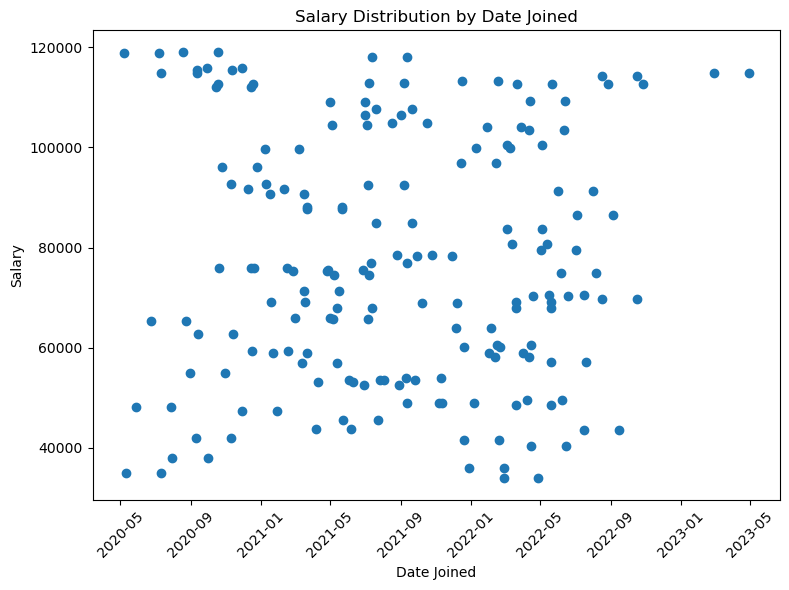

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Date Joined'], data['Salary'])
plt.title('Salary Distribution by Date Joined')
plt.xlabel('Date Joined')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Based on the analysis, it appears that tenure does not significantly affect salaries as much as skills and job type do, which are more closely correlated with salary variations.

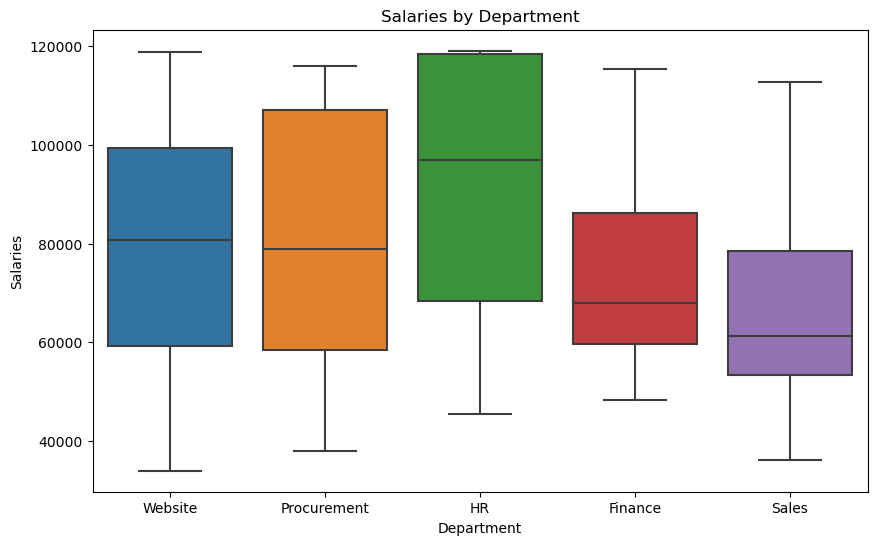

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=data)
plt.title('Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Salaries')
plt.show()

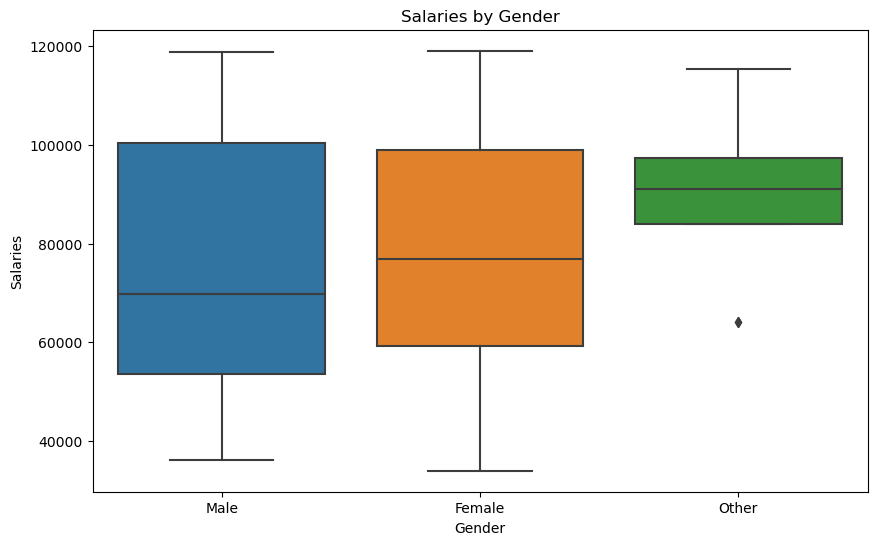

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Salaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Salaries')
plt.show()